# Enhanced Data Preprocessing with Rich Visualizations

Comprehensive visual analysis for sepsis prediction preprocessing

**Enhanced Features:**
- Interactive data exploration with multiple chart types
- Missing data heatmaps and pattern analysis
- Feature distribution analysis before/after transformation
- Clinical score visualizations and correlations
- Outlier detection and handling visualizations
- Feature importance and selection visualizations

In [2]:
# Enhanced imports for rich visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from scipy import stats
from scipy.stats import zscore
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Enhanced visualization libraries imported")
print("📊 Ready for comprehensive visual analysis")

✅ Enhanced visualization libraries imported
📊 Ready for comprehensive visual analysis


## 📈 Step 1: Load and Sample Data

In [3]:
# Load and sample dataset for visualization analysis
print("🔄 Loading dataset for visual analysis...")
df = pd.read_csv('../Dataset.csv')

# Sample for visualization (adjust as needed)
SAMPLE_SIZE = 50000
if len(df) > SAMPLE_SIZE:
    df_sample = df.sample(n=SAMPLE_SIZE, random_state=42)
else:
    df_sample = df.copy()

print(f"📊 Dataset for visualization: {df_sample.shape}")

🔄 Loading dataset for visual analysis...
📊 Dataset for visualization: (50000, 44)


## 📊 Step 2: Dataset Overview Visualizations

📈 Creating dataset overview visualizations...


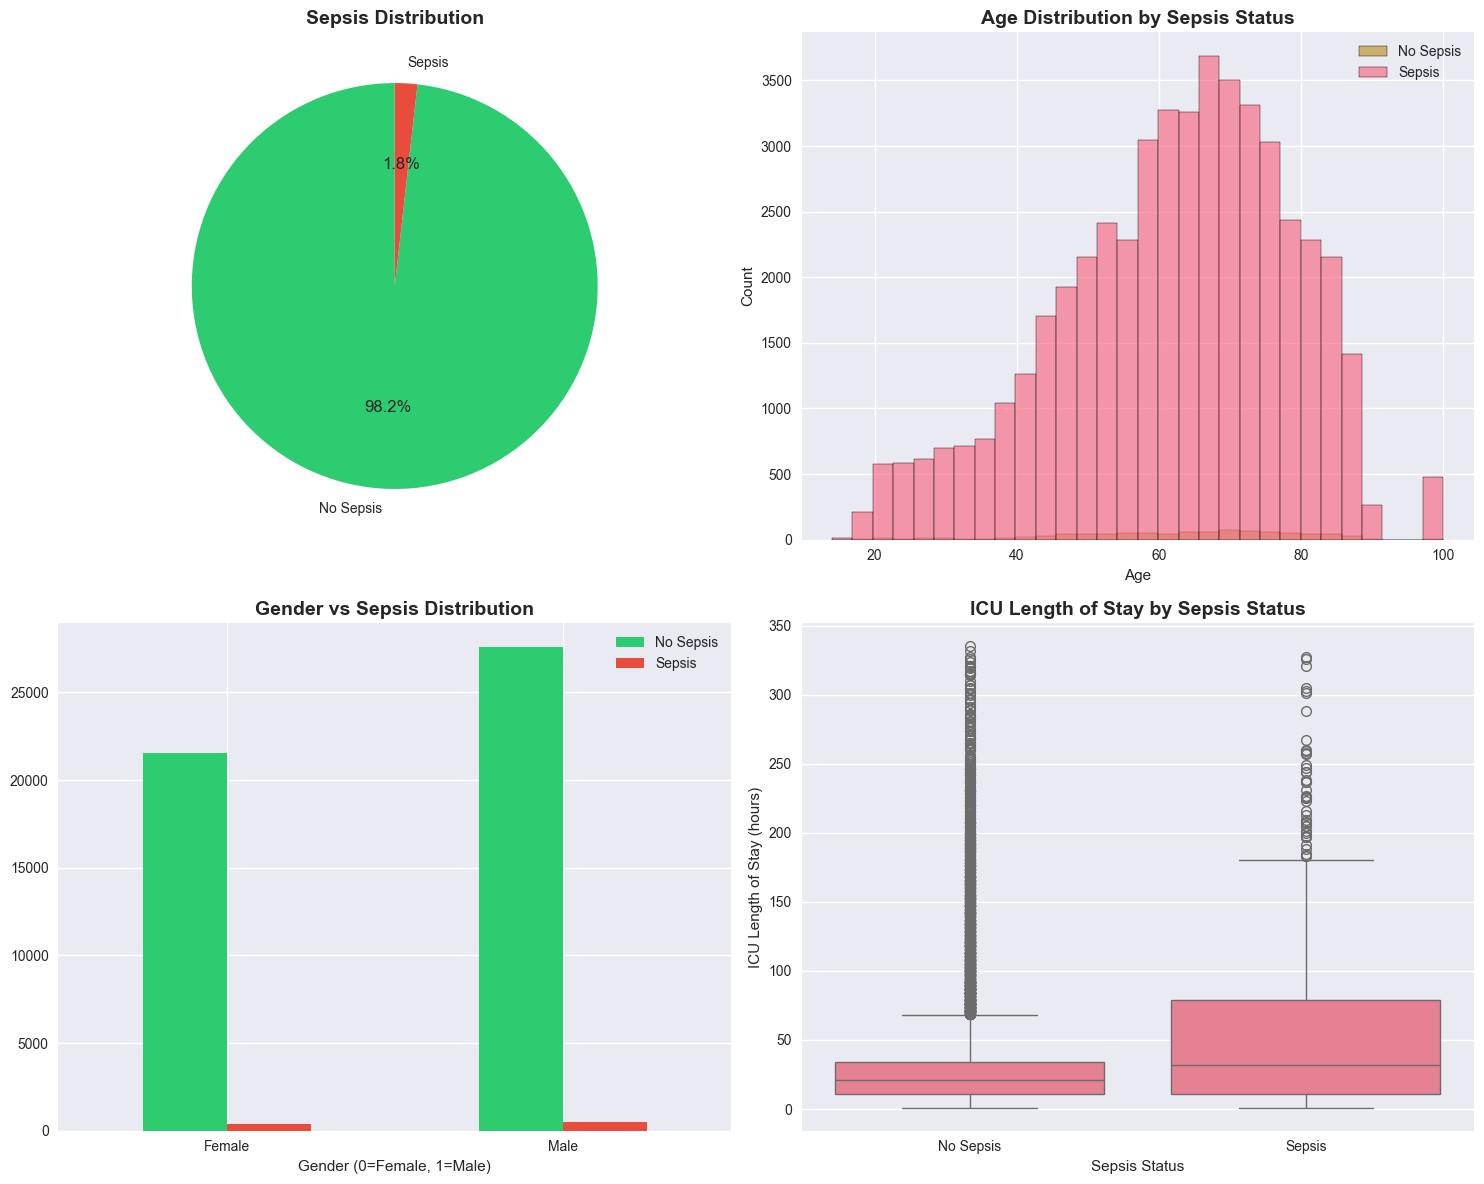

📊 Basic dataset visualizations complete


In [4]:
# Dataset Overview Visualizations
print("📈 Creating dataset overview visualizations...")

# Target Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sepsis distribution pie chart
sepsis_counts = df_sample['SepsisLabel'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for no sepsis, red for sepsis
axes[0,0].pie(sepsis_counts.values, labels=['No Sepsis', 'Sepsis'], 
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Sepsis Distribution', fontsize=14, fontweight='bold')

# Age distribution by sepsis status
sns.histplot(data=df_sample, x='Age', hue='SepsisLabel', 
             bins=30, alpha=0.7, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Sepsis Status', fontsize=14, fontweight='bold')
axes[0,1].legend(['No Sepsis', 'Sepsis'])

# Gender distribution
gender_sepsis = pd.crosstab(df_sample['Gender'], df_sample['SepsisLabel'])
gender_sepsis.plot(kind='bar', ax=axes[1,0], color=['#2ecc71', '#e74c3c'])
axes[1,0].set_title('Gender vs Sepsis Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Gender (0=Female, 1=Male)')
axes[1,0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1,0].legend(['No Sepsis', 'Sepsis'])

# ICU Length of Stay distribution
sns.boxplot(data=df_sample, x='SepsisLabel', y='ICULOS', ax=axes[1,1])
axes[1,1].set_title('ICU Length of Stay by Sepsis Status', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Sepsis Status')
axes[1,1].set_ylabel('ICU Length of Stay (hours)')
axes[1,1].set_xticklabels(['No Sepsis', 'Sepsis'])

plt.tight_layout()
plt.show()

print("📊 Basic dataset visualizations complete")

## 🔍 Step 3: Missing Data Analysis

🔍 Analyzing missing data patterns...


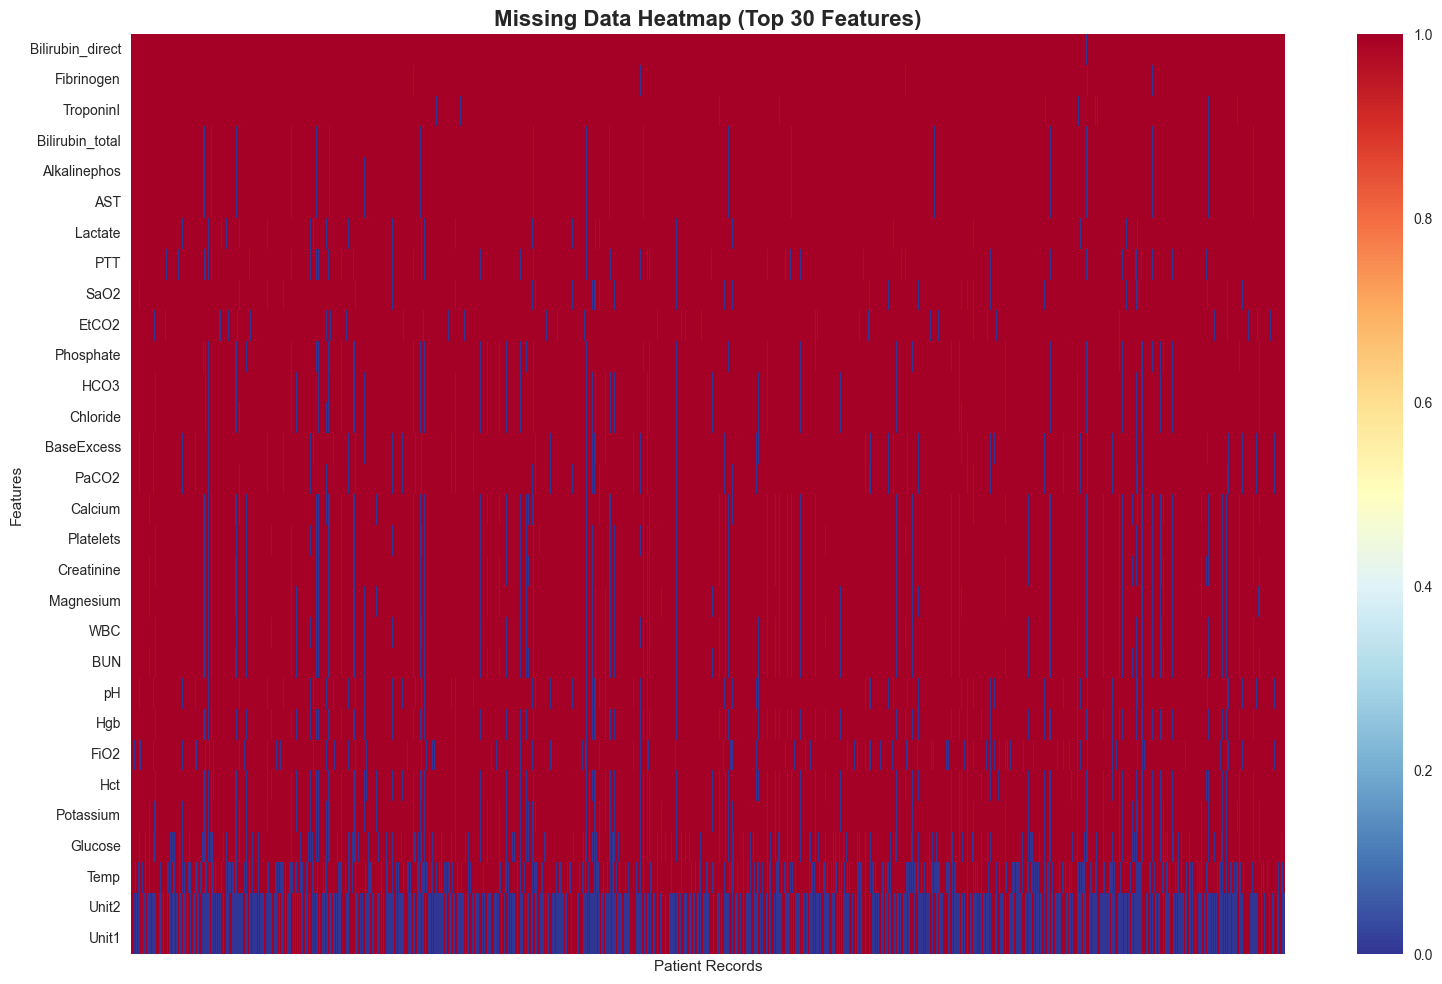

🔍 Missing data heatmap complete


In [5]:
# Missing Data Heatmap and Patterns
print("🔍 Analyzing missing data patterns...")

# Calculate missing percentages
missing_percent = (df_sample.isnull().sum() / len(df_sample) * 100).sort_values(ascending=False)
missing_features = missing_percent[missing_percent > 0]

# 1. Missing data heatmap
plt.figure(figsize=(16, 10))
# Select top 30 features with missing data for visualization
top_missing_features = missing_features.head(30).index.tolist()
missing_matrix = df_sample[top_missing_features].isnull()

sns.heatmap(missing_matrix.T, cbar=True, cmap='RdYlBu_r', 
            xticklabels=False, yticklabels=True)
plt.title('Missing Data Heatmap (Top 30 Features)', fontsize=16, fontweight='bold')
plt.ylabel('Features')
plt.xlabel('Patient Records')
plt.tight_layout()
plt.show()

print("🔍 Missing data heatmap complete")

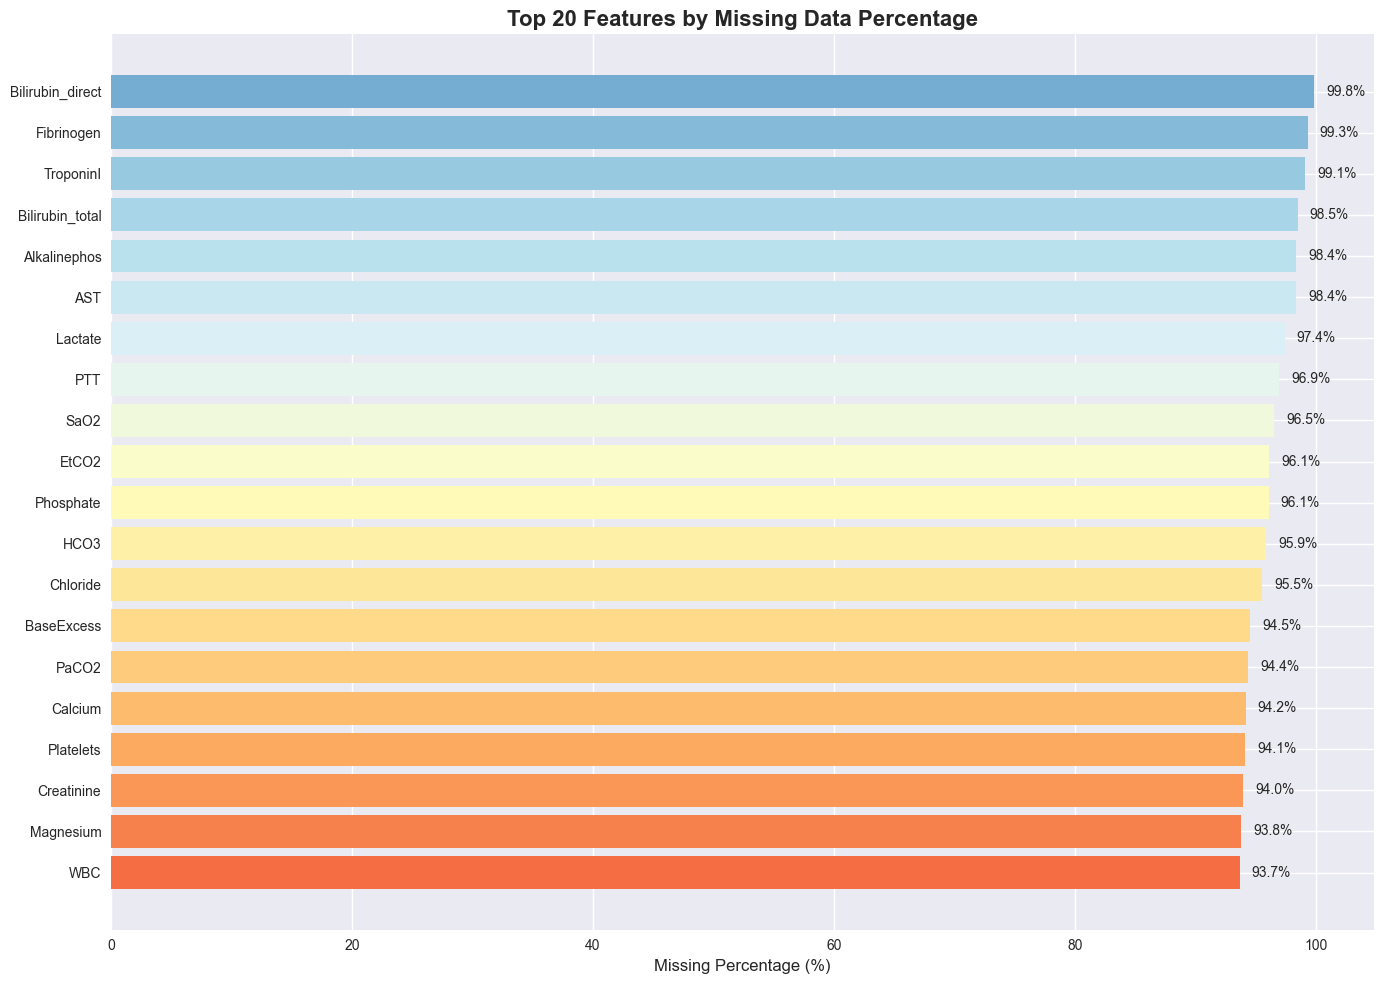

In [6]:
# 2. Missing data percentage bar chart
plt.figure(figsize=(14, 10))
top_20_missing = missing_features.head(20)
colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(top_20_missing)))

bars = plt.barh(range(len(top_20_missing)), top_20_missing.values, color=colors)
plt.yticks(range(len(top_20_missing)), top_20_missing.index)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.title('Top 20 Features by Missing Data Percentage', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add percentage labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

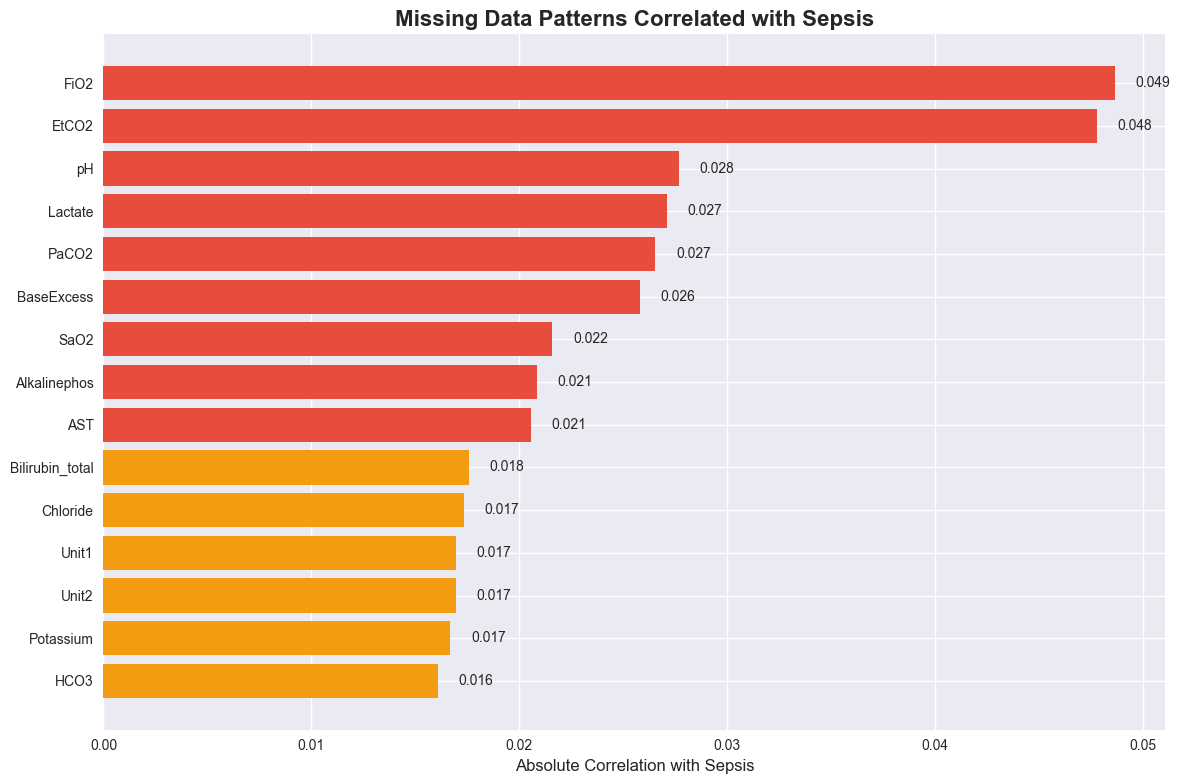

🔍 Missing data analysis visualizations complete


In [7]:
# 3. Missing data correlation with sepsis
missing_indicators = df_sample.isnull().astype(int)
missing_sepsis_corr = missing_indicators.corrwith(df_sample['SepsisLabel']).abs().sort_values(ascending=False)
top_corr_missing = missing_sepsis_corr.head(15)

plt.figure(figsize=(12, 8))
colors = ['#e74c3c' if x > 0.02 else '#f39c12' if x > 0.01 else '#3498db' for x in top_corr_missing.values]
bars = plt.barh(range(len(top_corr_missing)), top_corr_missing.values, color=colors)
plt.yticks(range(len(top_corr_missing)), top_corr_missing.index)
plt.xlabel('Absolute Correlation with Sepsis', fontsize=12)
plt.title('Missing Data Patterns Correlated with Sepsis', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add correlation values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("🔍 Missing data analysis visualizations complete")

## 🏥 Step 4: Clinical Feature Analysis

🏥 Analyzing clinical feature distributions...


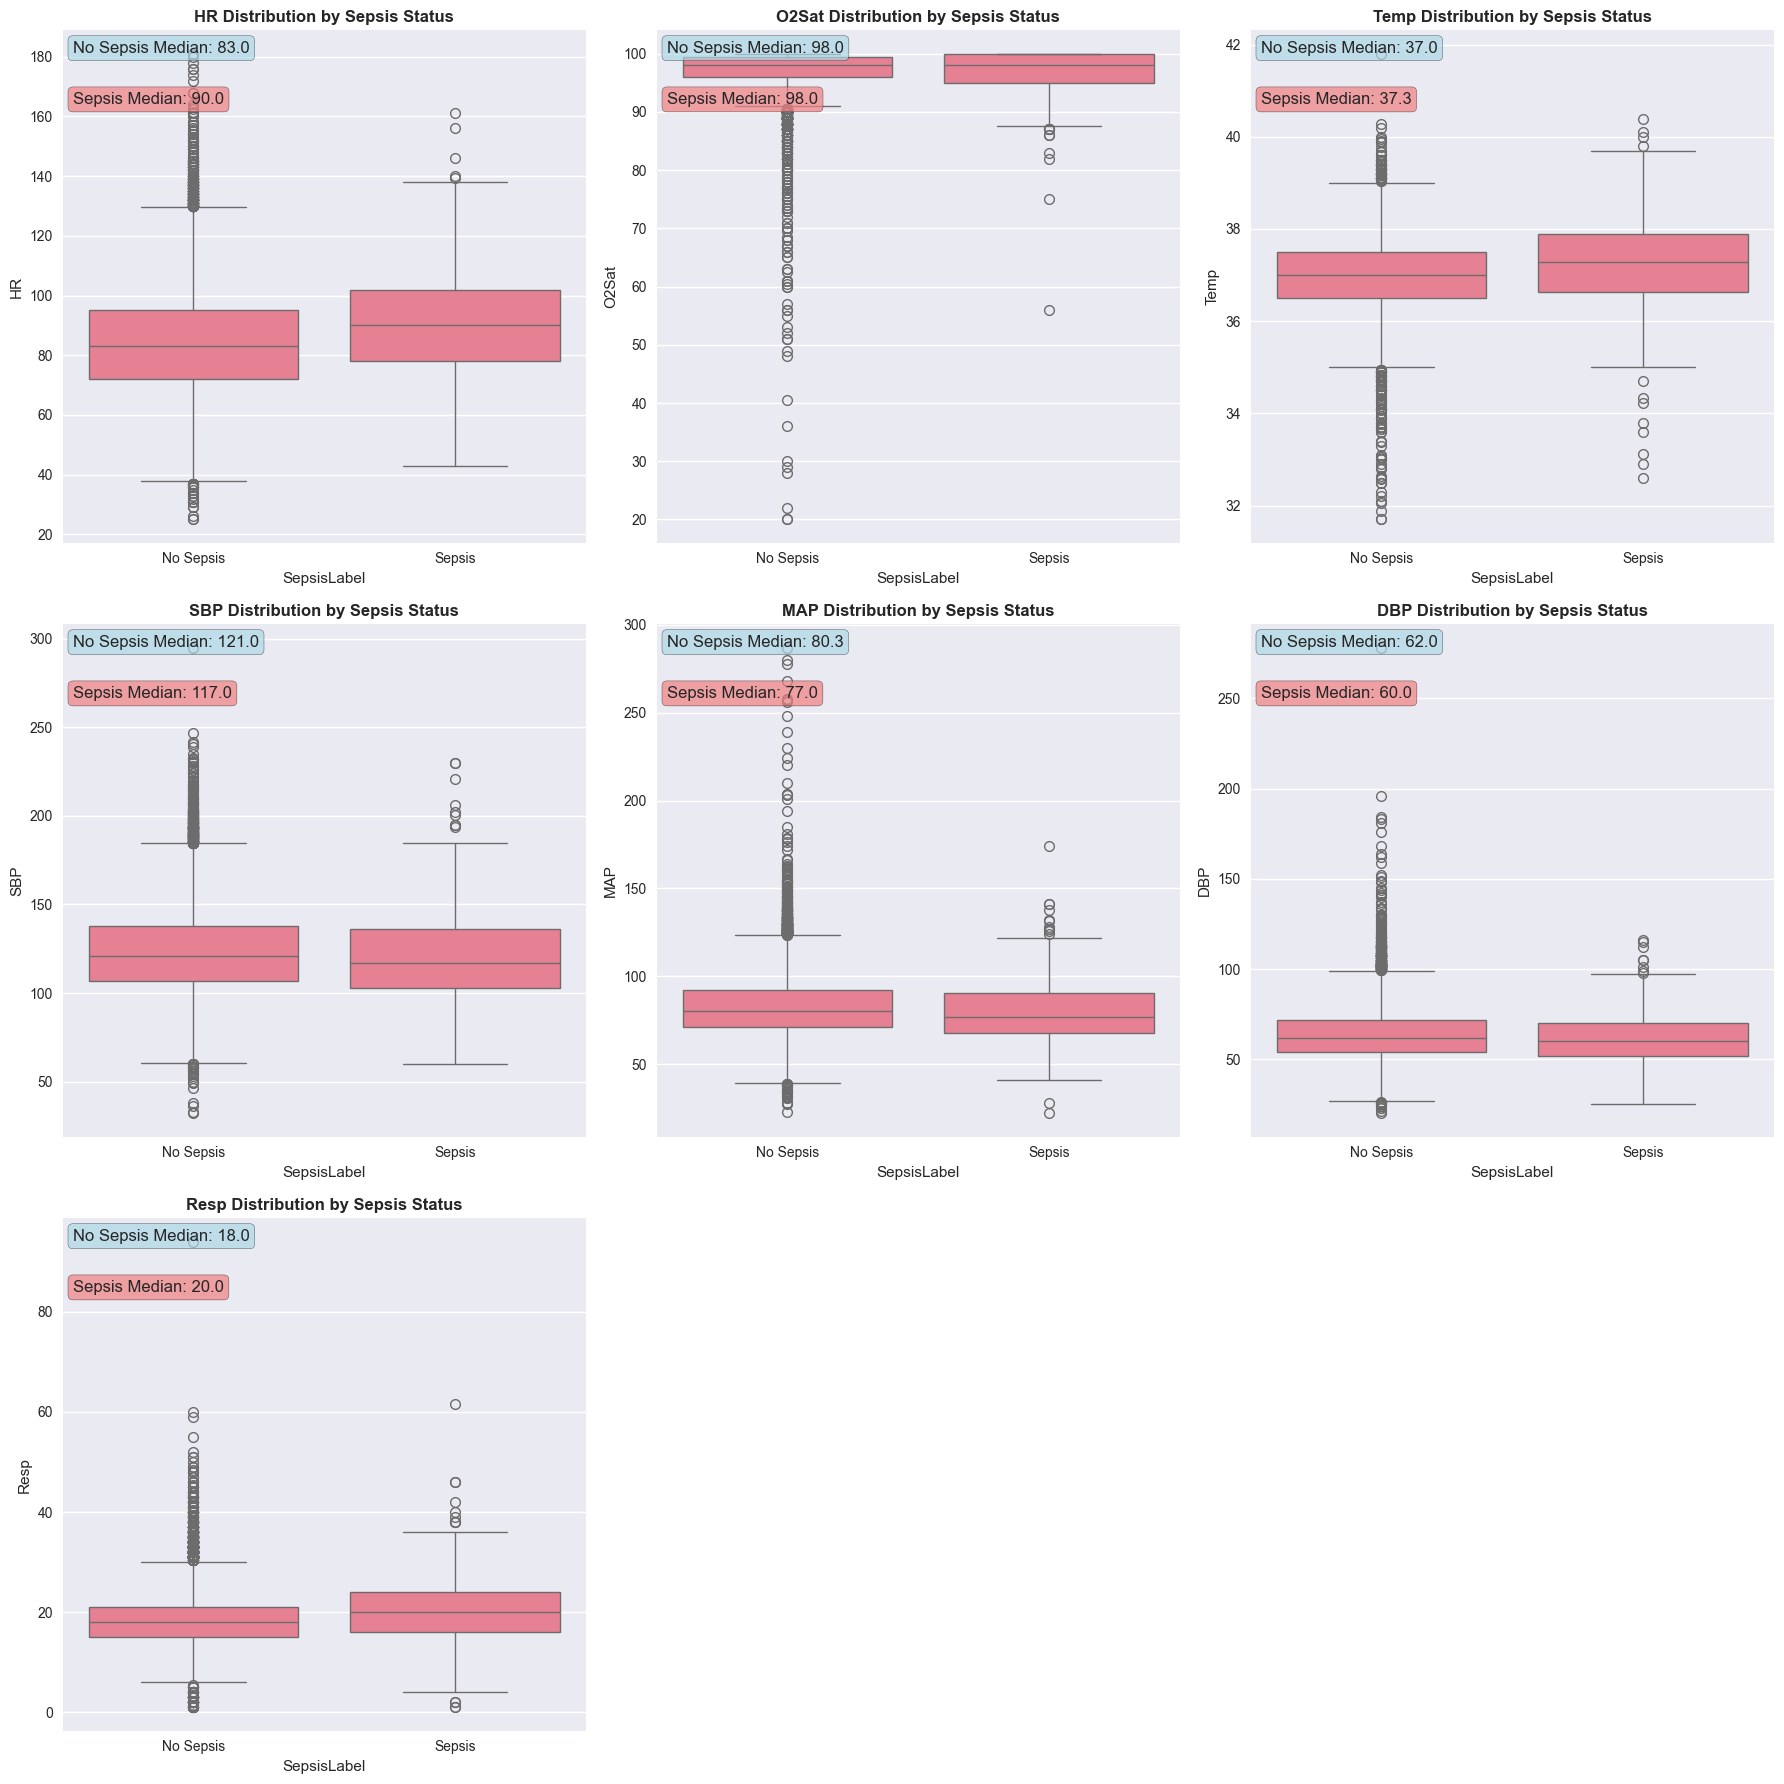

📊 Vital signs analysis complete for 7 features


In [8]:
# Clinical Feature Distribution Analysis
print("🏥 Analyzing clinical feature distributions...")

# Vital signs distribution analysis
vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']
available_vitals = [col for col in vital_signs if col in df_sample.columns]

# Create subplots for vital signs
n_vitals = len(available_vitals)
n_cols = 3
n_rows = (n_vitals + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, vital in enumerate(available_vitals):
    if i < len(axes):
        # Box plot by sepsis status
        sns.boxplot(data=df_sample, x='SepsisLabel', y=vital, ax=axes[i])
        axes[i].set_title(f'{vital} Distribution by Sepsis Status', fontweight='bold')
        axes[i].set_xticklabels(['No Sepsis', 'Sepsis'])
        
        # Add statistical annotation
        no_sepsis_median = df_sample[df_sample['SepsisLabel']==0][vital].median()
        sepsis_median = df_sample[df_sample['SepsisLabel']==1][vital].median()
        axes[i].text(0.02, 0.98, f'No Sepsis Median: {no_sepsis_median:.1f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        axes[i].text(0.02, 0.88, f'Sepsis Median: {sepsis_median:.1f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Hide empty subplots
for i in range(len(available_vitals), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print(f"📊 Vital signs analysis complete for {len(available_vitals)} features")

📊 Analyzing 8 laboratory values...


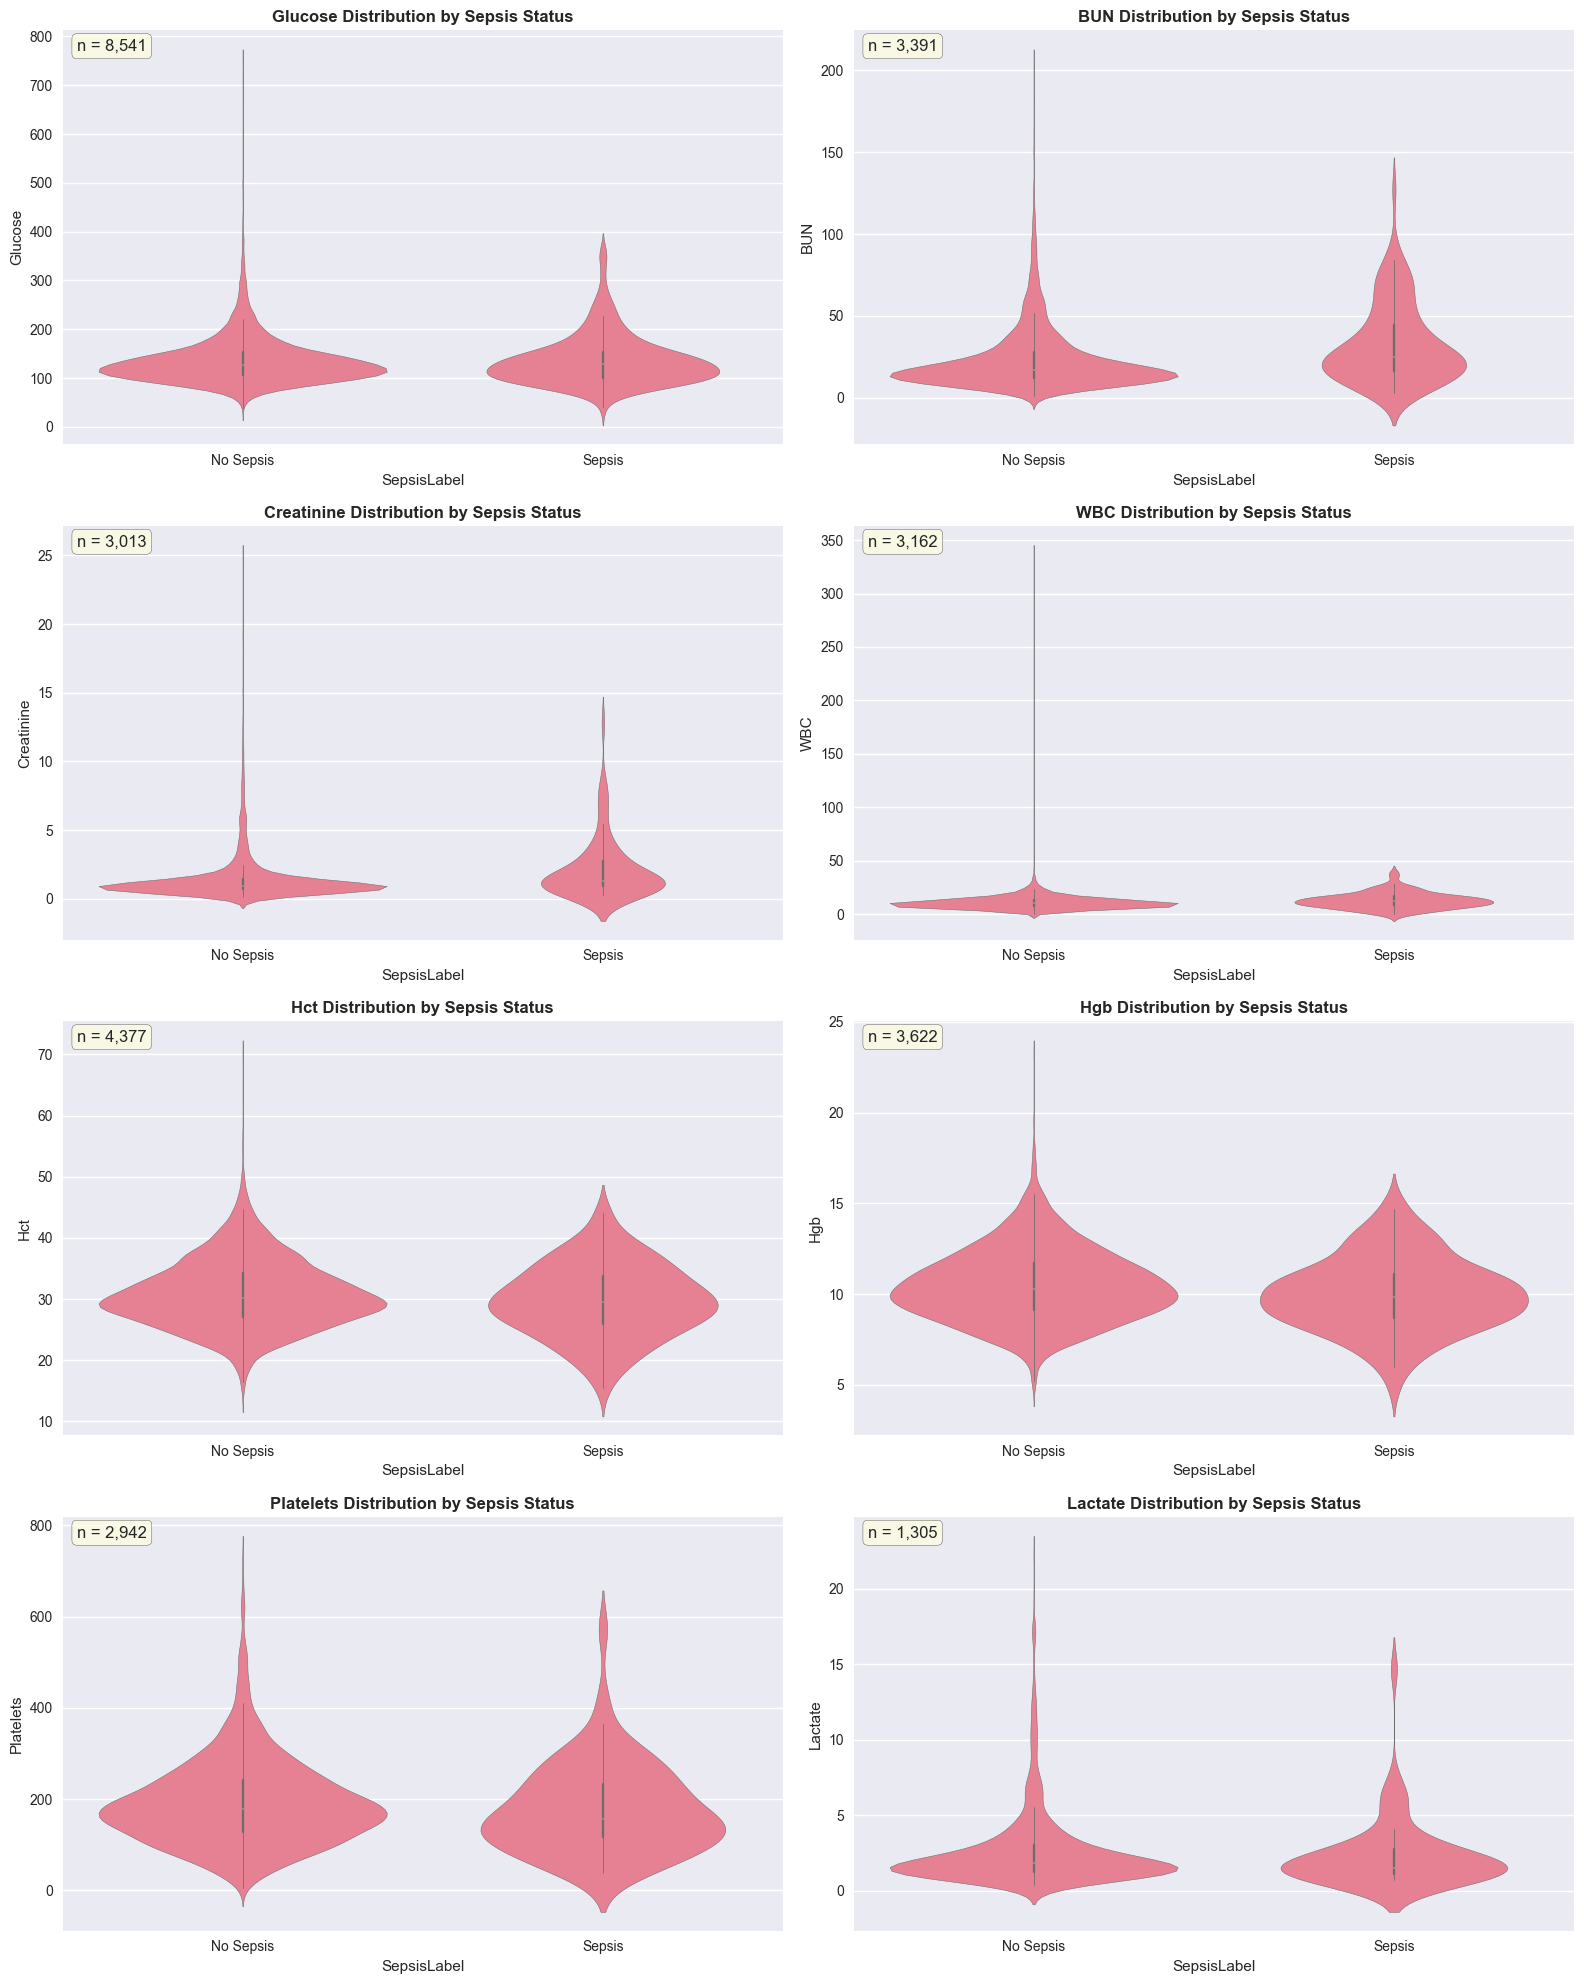

📊 Laboratory values analysis complete


In [9]:
# Laboratory values distribution analysis
lab_values = ['Glucose', 'BUN', 'Creatinine', 'WBC', 'Hct', 'Hgb', 'Platelets', 'Lactate']
available_labs = [col for col in lab_values if col in df_sample.columns and df_sample[col].notna().sum() > 1000]

if available_labs:
    print(f"📊 Analyzing {len(available_labs)} laboratory values...")
    
    n_labs = len(available_labs)
    n_cols = 2
    n_rows = (n_labs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, lab in enumerate(available_labs):
        if i < len(axes):
            # Violin plot for better distribution visualization
            sns.violinplot(data=df_sample, x='SepsisLabel', y=lab, ax=axes[i])
            axes[i].set_title(f'{lab} Distribution by Sepsis Status', fontweight='bold')
            axes[i].set_xticklabels(['No Sepsis', 'Sepsis'])
            
            # Add sample size annotation
            n_samples = df_sample[lab].notna().sum()
            axes[i].text(0.02, 0.98, f'n = {n_samples:,}', 
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    # Hide empty subplots
    for i in range(len(available_labs), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No laboratory values with sufficient data for visualization")

print("📊 Laboratory values analysis complete")

## 🔬 Step 5: Clinical Feature Engineering

In [10]:
# Clinical Feature Engineering Visualizations
print("🔬 Creating and visualizing clinical composite scores...")

# SIRS Score calculation
sirs_criteria = 0
if 'Temp' in df_sample.columns:
    sirs_criteria += ((df_sample['Temp'] > 38) | (df_sample['Temp'] < 36)).astype(int)
if 'HR' in df_sample.columns:
    sirs_criteria += (df_sample['HR'] > 90).astype(int)
if 'Resp' in df_sample.columns:
    sirs_criteria += (df_sample['Resp'] > 20).astype(int)
if 'WBC' in df_sample.columns:
    sirs_criteria += ((df_sample['WBC'] > 12) | (df_sample['WBC'] < 4)).astype(int)
df_sample['SIRS_Score'] = sirs_criteria

# qSOFA Score calculation
qsofa_score = 0
if 'SBP' in df_sample.columns:
    qsofa_score += (df_sample['SBP'] <= 100).astype(int)
if 'Resp' in df_sample.columns:
    qsofa_score += (df_sample['Resp'] >= 22).astype(int)
df_sample['qSOFA_Score'] = qsofa_score

# Shock Index calculation
if 'HR' in df_sample.columns and 'SBP' in df_sample.columns:
    df_sample['Shock_Index'] = df_sample['HR'] / (df_sample['SBP'] + 1e-6)
    df_sample['Shock_Index_High'] = (df_sample['Shock_Index'] > 0.9).astype(int)

print("🔬 Clinical scores calculated successfully")

🔬 Creating and visualizing clinical composite scores...
🔬 Clinical scores calculated successfully


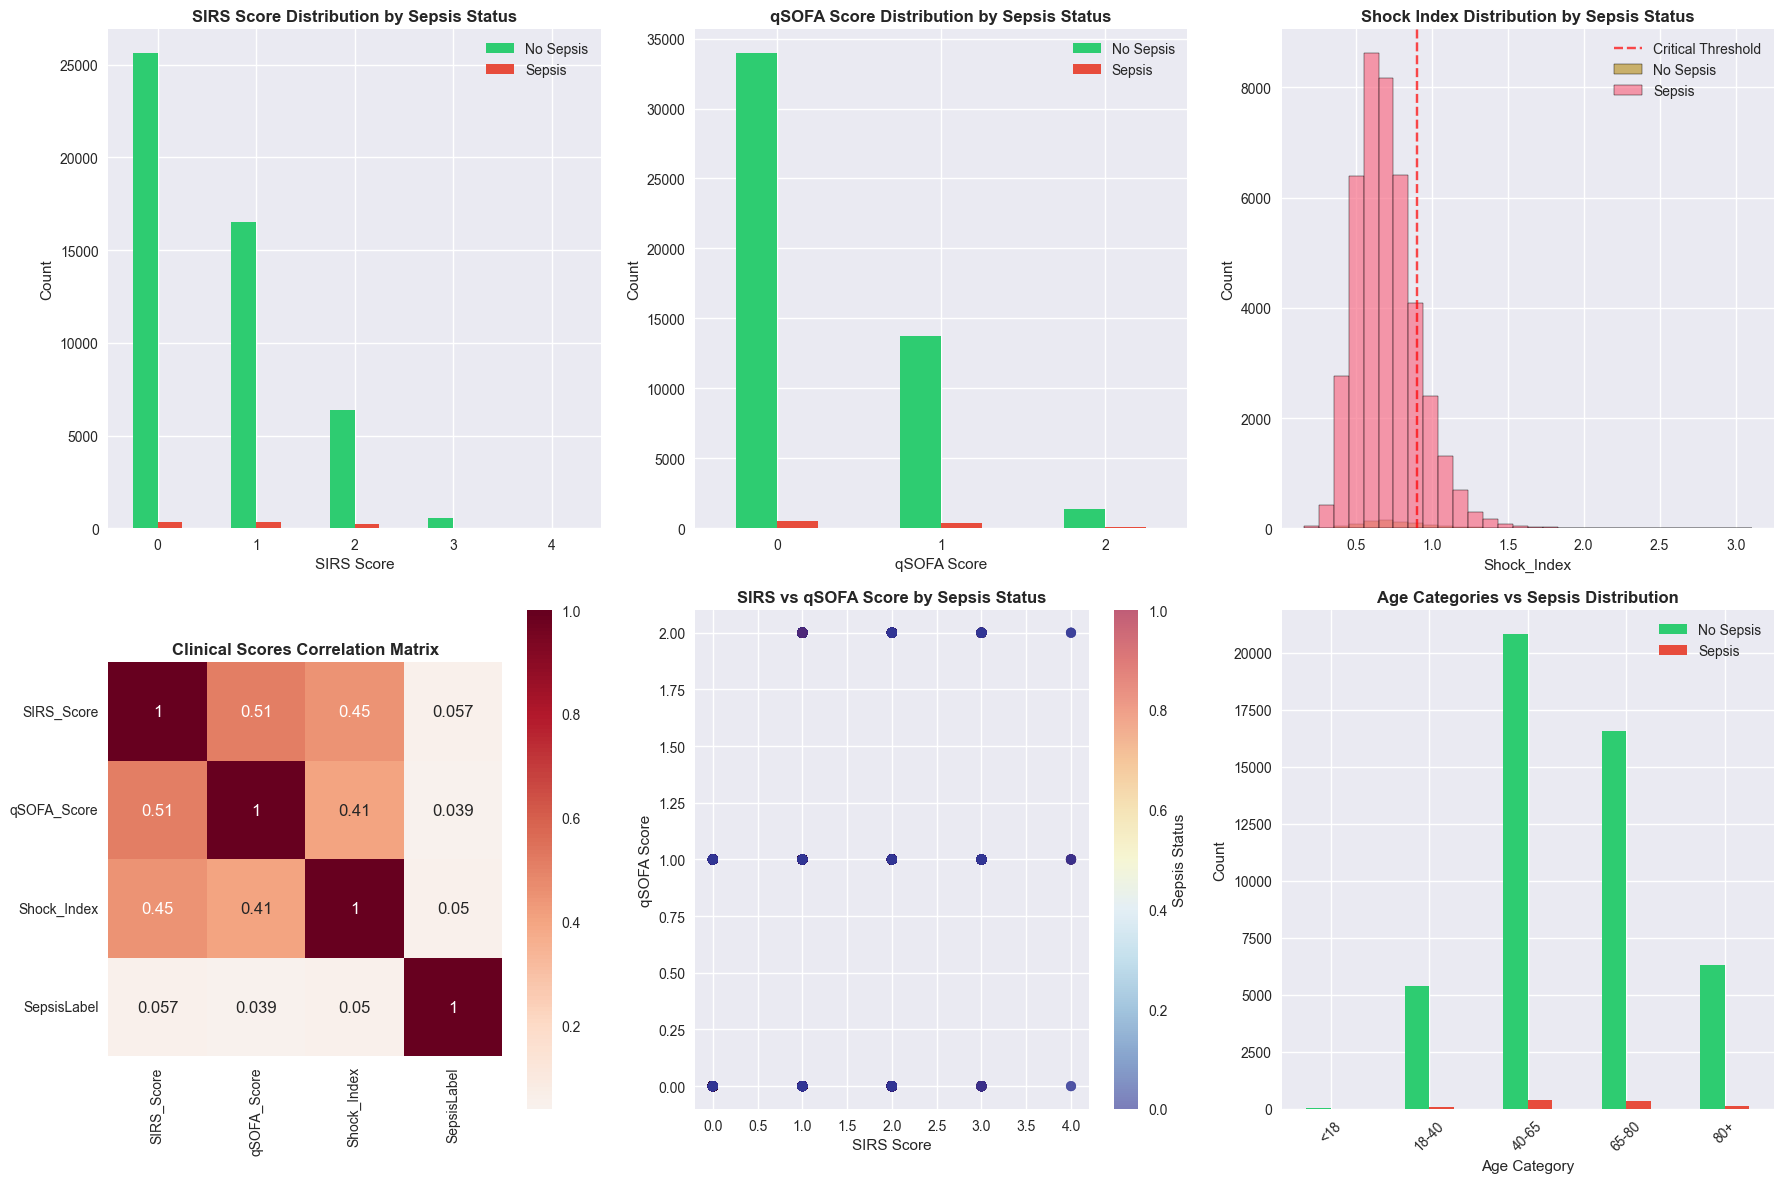

🔬 Clinical feature engineering visualizations complete


In [11]:
# Visualize clinical scores
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# SIRS Score distribution
sirs_sepsis = pd.crosstab(df_sample['SIRS_Score'], df_sample['SepsisLabel'])
sirs_sepsis.plot(kind='bar', ax=axes[0,0], color=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('SIRS Score Distribution by Sepsis Status', fontweight='bold')
axes[0,0].set_xlabel('SIRS Score')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(['No Sepsis', 'Sepsis'])
axes[0,0].tick_params(axis='x', rotation=0)

# qSOFA Score distribution
qsofa_sepsis = pd.crosstab(df_sample['qSOFA_Score'], df_sample['SepsisLabel'])
qsofa_sepsis.plot(kind='bar', ax=axes[0,1], color=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('qSOFA Score Distribution by Sepsis Status', fontweight='bold')
axes[0,1].set_xlabel('qSOFA Score')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['No Sepsis', 'Sepsis'])
axes[0,1].tick_params(axis='x', rotation=0)

# Shock Index distribution
if 'Shock_Index' in df_sample.columns:
    sns.histplot(data=df_sample, x='Shock_Index', hue='SepsisLabel', 
                 bins=30, alpha=0.7, ax=axes[0,2])
    axes[0,2].set_title('Shock Index Distribution by Sepsis Status', fontweight='bold')
    axes[0,2].axvline(x=0.9, color='red', linestyle='--', alpha=0.7, label='Critical Threshold')
    axes[0,2].legend(['Critical Threshold', 'No Sepsis', 'Sepsis'])

# Clinical score correlations heatmap
clinical_scores = ['SIRS_Score', 'qSOFA_Score']
if 'Shock_Index' in df_sample.columns:
    clinical_scores.append('Shock_Index')
clinical_scores.append('SepsisLabel')

corr_matrix = df_sample[clinical_scores].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[1,0])
axes[1,0].set_title('Clinical Scores Correlation Matrix', fontweight='bold')

# SIRS vs qSOFA scatter plot
scatter = axes[1,1].scatter(df_sample['SIRS_Score'], df_sample['qSOFA_Score'], 
                           c=df_sample['SepsisLabel'], cmap='RdYlBu_r', alpha=0.6)
axes[1,1].set_xlabel('SIRS Score')
axes[1,1].set_ylabel('qSOFA Score')
axes[1,1].set_title('SIRS vs qSOFA Score by Sepsis Status', fontweight='bold')
plt.colorbar(scatter, ax=axes[1,1], label='Sepsis Status')

# Age categories visualization
df_sample['Age_Category'] = pd.cut(df_sample['Age'], 
                                   bins=[0, 18, 40, 65, 80, 120], 
                                   labels=['<18', '18-40', '40-65', '65-80', '80+'])
age_sepsis = pd.crosstab(df_sample['Age_Category'], df_sample['SepsisLabel'])
age_sepsis.plot(kind='bar', ax=axes[1,2], color=['#2ecc71', '#e74c3c'])
axes[1,2].set_title('Age Categories vs Sepsis Distribution', fontweight='bold')
axes[1,2].set_xlabel('Age Category')
axes[1,2].set_ylabel('Count')
axes[1,2].legend(['No Sepsis', 'Sepsis'])
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("🔬 Clinical feature engineering visualizations complete")

## ⏰ Step 6: Temporal Pattern Analysis

In [12]:
# Temporal Pattern Analysis
print("⏰ Analyzing temporal patterns in sepsis development...")

# Group by patient and analyze progression
patient_progression = df_sample.groupby('Patient_ID').agg({
    'ICULOS': ['min', 'max', 'count'],
    'SepsisLabel': ['sum', 'max'],
    'Age': 'first',
    'Gender': 'first'
}).reset_index()

# Flatten column names
patient_progression.columns = ['Patient_ID', 'Min_ICULOS', 'Max_ICULOS', 'Total_Hours',
                              'Sepsis_Hours', 'Ever_Sepsis', 'Age', 'Gender']

# Calculate time to sepsis onset
sepsis_patients = df_sample[df_sample['SepsisLabel'] == 1]
if not sepsis_patients.empty:
    time_to_sepsis = sepsis_patients.groupby('Patient_ID')['ICULOS'].min().reset_index()
    time_to_sepsis.columns = ['Patient_ID', 'Sepsis_Onset_Hour']
    patient_progression = patient_progression.merge(time_to_sepsis, on='Patient_ID', how='left')

print(f"📊 Patient progression analysis complete for {len(patient_progression)} patients")

⏰ Analyzing temporal patterns in sepsis development...
📊 Patient progression analysis complete for 26996 patients


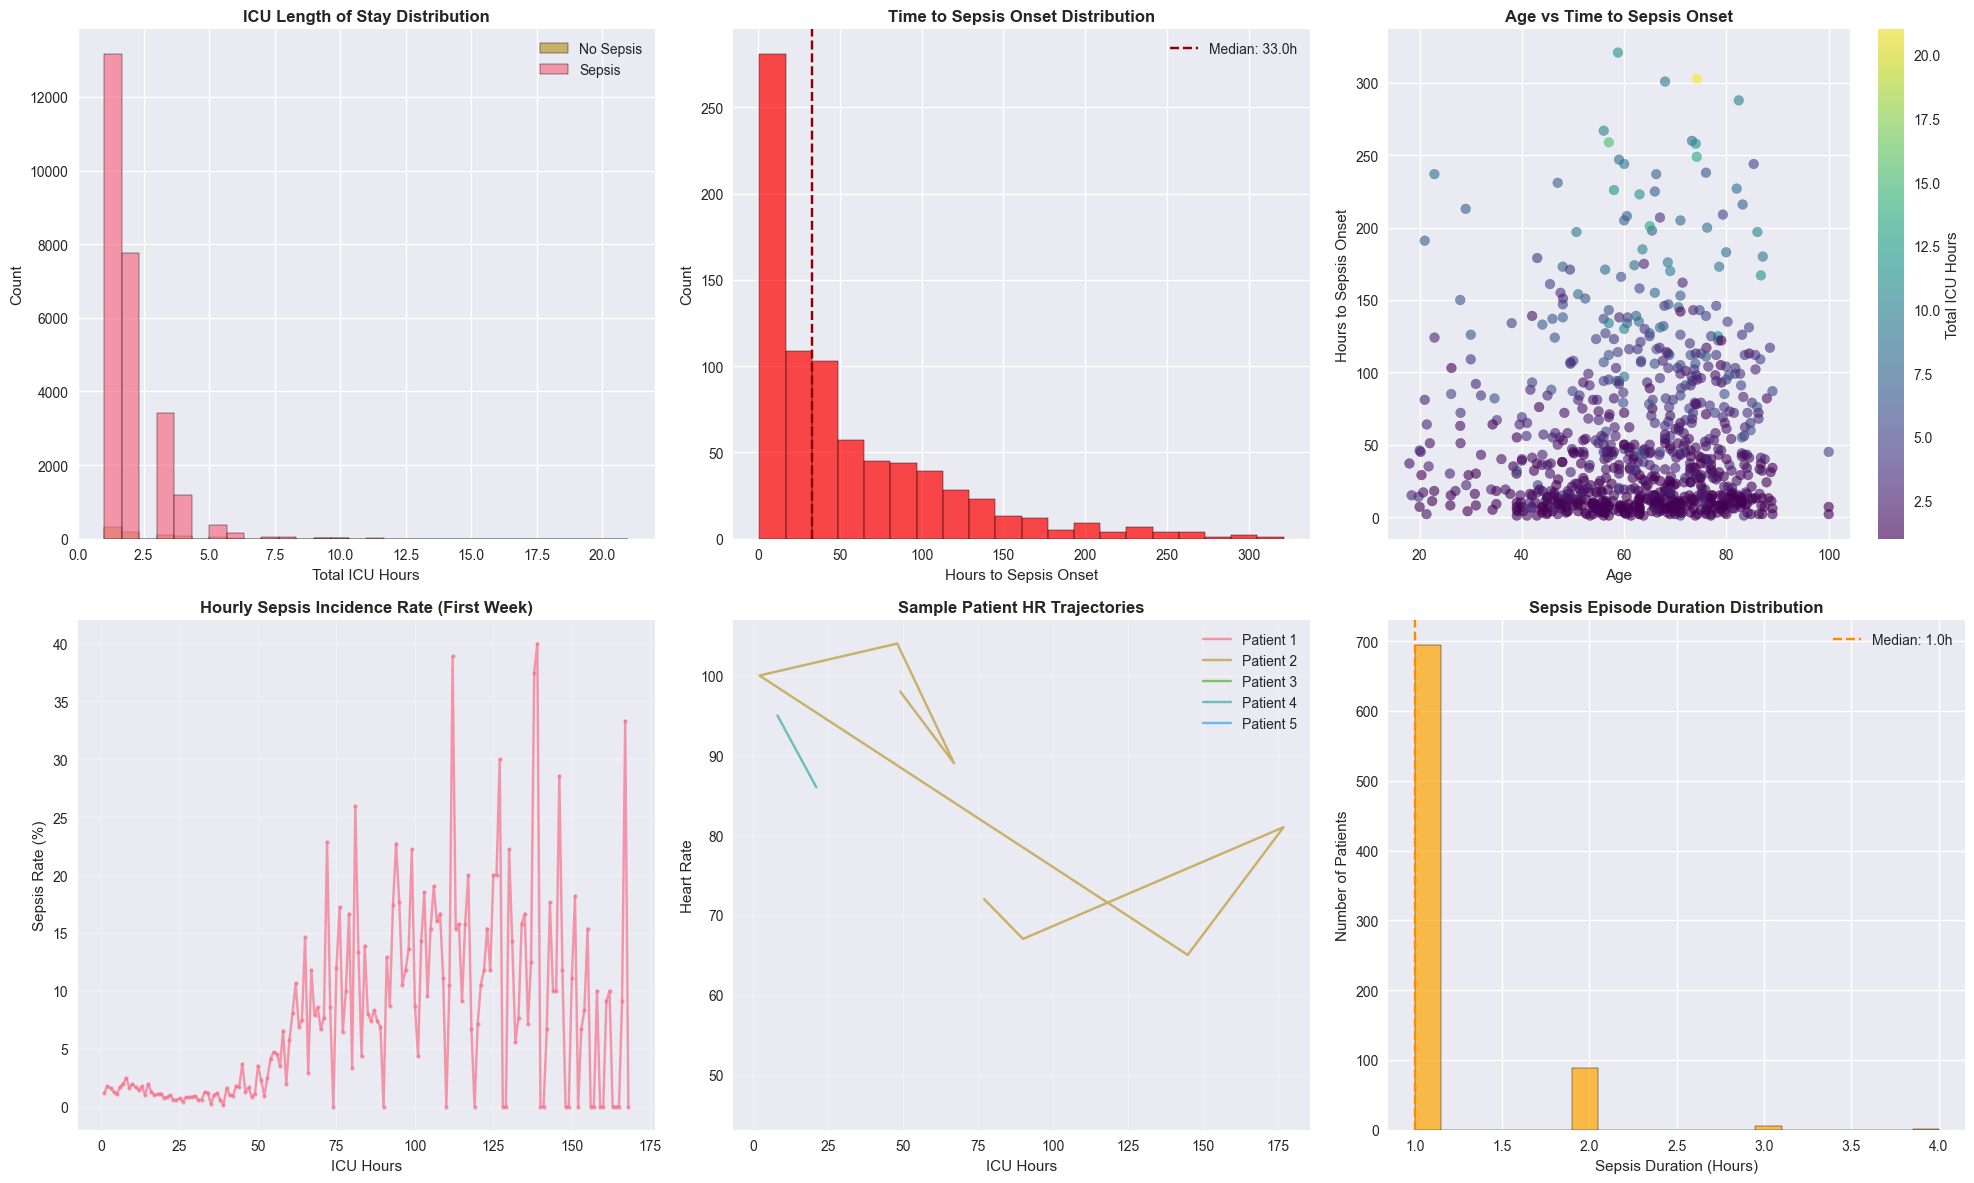

⏰ Temporal pattern analysis complete


In [13]:
# Create temporal visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# ICU Length of Stay distribution
sns.histplot(data=patient_progression, x='Total_Hours', hue='Ever_Sepsis', 
             bins=30, alpha=0.7, ax=axes[0,0])
axes[0,0].set_title('ICU Length of Stay Distribution', fontweight='bold')
axes[0,0].set_xlabel('Total ICU Hours')
axes[0,0].legend(['No Sepsis', 'Sepsis'])

# Time to sepsis onset
if 'Sepsis_Onset_Hour' in patient_progression.columns:
    sepsis_onset_data = patient_progression.dropna(subset=['Sepsis_Onset_Hour'])
    sns.histplot(data=sepsis_onset_data, x='Sepsis_Onset_Hour', 
                 bins=20, alpha=0.7, ax=axes[0,1], color='red')
    axes[0,1].set_title('Time to Sepsis Onset Distribution', fontweight='bold')
    axes[0,1].set_xlabel('Hours to Sepsis Onset')
    axes[0,1].axvline(x=sepsis_onset_data['Sepsis_Onset_Hour'].median(), 
                     color='darkred', linestyle='--', 
                     label=f'Median: {sepsis_onset_data["Sepsis_Onset_Hour"].median():.1f}h')
    axes[0,1].legend()

# Age vs Time to Sepsis
if 'Sepsis_Onset_Hour' in patient_progression.columns:
    scatter_data = patient_progression.dropna(subset=['Sepsis_Onset_Hour'])
    scatter = axes[0,2].scatter(scatter_data['Age'], scatter_data['Sepsis_Onset_Hour'], 
                               alpha=0.6, c=scatter_data['Total_Hours'], cmap='viridis')
    axes[0,2].set_xlabel('Age')
    axes[0,2].set_ylabel('Hours to Sepsis Onset')
    axes[0,2].set_title('Age vs Time to Sepsis Onset', fontweight='bold')
    plt.colorbar(scatter, ax=axes[0,2], label='Total ICU Hours')

# Hourly sepsis incidence pattern
hourly_sepsis = df_sample.groupby('ICULOS')['SepsisLabel'].agg(['count', 'sum']).reset_index()
hourly_sepsis['Sepsis_Rate'] = hourly_sepsis['sum'] / hourly_sepsis['count'] * 100
hourly_sepsis = hourly_sepsis[hourly_sepsis['ICULOS'] <= 168]  # First week only

axes[1,0].plot(hourly_sepsis['ICULOS'], hourly_sepsis['Sepsis_Rate'], 
               marker='o', markersize=3, alpha=0.7)
axes[1,0].set_xlabel('ICU Hours')
axes[1,0].set_ylabel('Sepsis Rate (%)')
axes[1,0].set_title('Hourly Sepsis Incidence Rate (First Week)', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Patient trajectory visualization (sample patients)
sample_patients = df_sample['Patient_ID'].unique()[:5]
for i, patient_id in enumerate(sample_patients):
    patient_data = df_sample[df_sample['Patient_ID'] == patient_id]
    if 'HR' in patient_data.columns:
        axes[1,1].plot(patient_data['ICULOS'], patient_data['HR'], 
                      alpha=0.7, label=f'Patient {i+1}')
        
        # Mark sepsis onset
        sepsis_hours = patient_data[patient_data['SepsisLabel'] == 1]['ICULOS']
        if not sepsis_hours.empty:
            axes[1,1].axvline(x=sepsis_hours.iloc[0], color=f'C{i}', 
                             linestyle='--', alpha=0.8)

axes[1,1].set_xlabel('ICU Hours')
axes[1,1].set_ylabel('Heart Rate')
axes[1,1].set_title('Sample Patient HR Trajectories', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Sepsis duration analysis
sepsis_duration = df_sample[df_sample['SepsisLabel'] == 1].groupby('Patient_ID')['ICULOS'].count()
if not sepsis_duration.empty:
    sns.histplot(sepsis_duration, bins=20, alpha=0.7, ax=axes[1,2], color='orange')
    axes[1,2].set_xlabel('Sepsis Duration (Hours)')
    axes[1,2].set_ylabel('Number of Patients')
    axes[1,2].set_title('Sepsis Episode Duration Distribution', fontweight='bold')
    axes[1,2].axvline(x=sepsis_duration.median(), color='darkorange', 
                     linestyle='--', label=f'Median: {sepsis_duration.median():.1f}h')
    axes[1,2].legend()

plt.tight_layout()
plt.show()

print("⏰ Temporal pattern analysis complete")

## 🔍 Step 7: Feature Importance Analysis

In [14]:
# Feature Importance and Selection Visualization
print("🔍 Analyzing feature importance for sepsis prediction...")

# Prepare data for feature importance analysis
numeric_features = df_sample.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_features if col not in ['Patient_ID', 'SepsisLabel', 'ICULOS']]

# Remove features with too many missing values
feature_cols = [col for col in feature_cols if df_sample[col].notna().sum() > len(df_sample) * 0.1]

print(f"📊 Analyzing {len(feature_cols)} features for importance...")

🔍 Analyzing feature importance for sepsis prediction...
📊 Analyzing 19 features for importance...


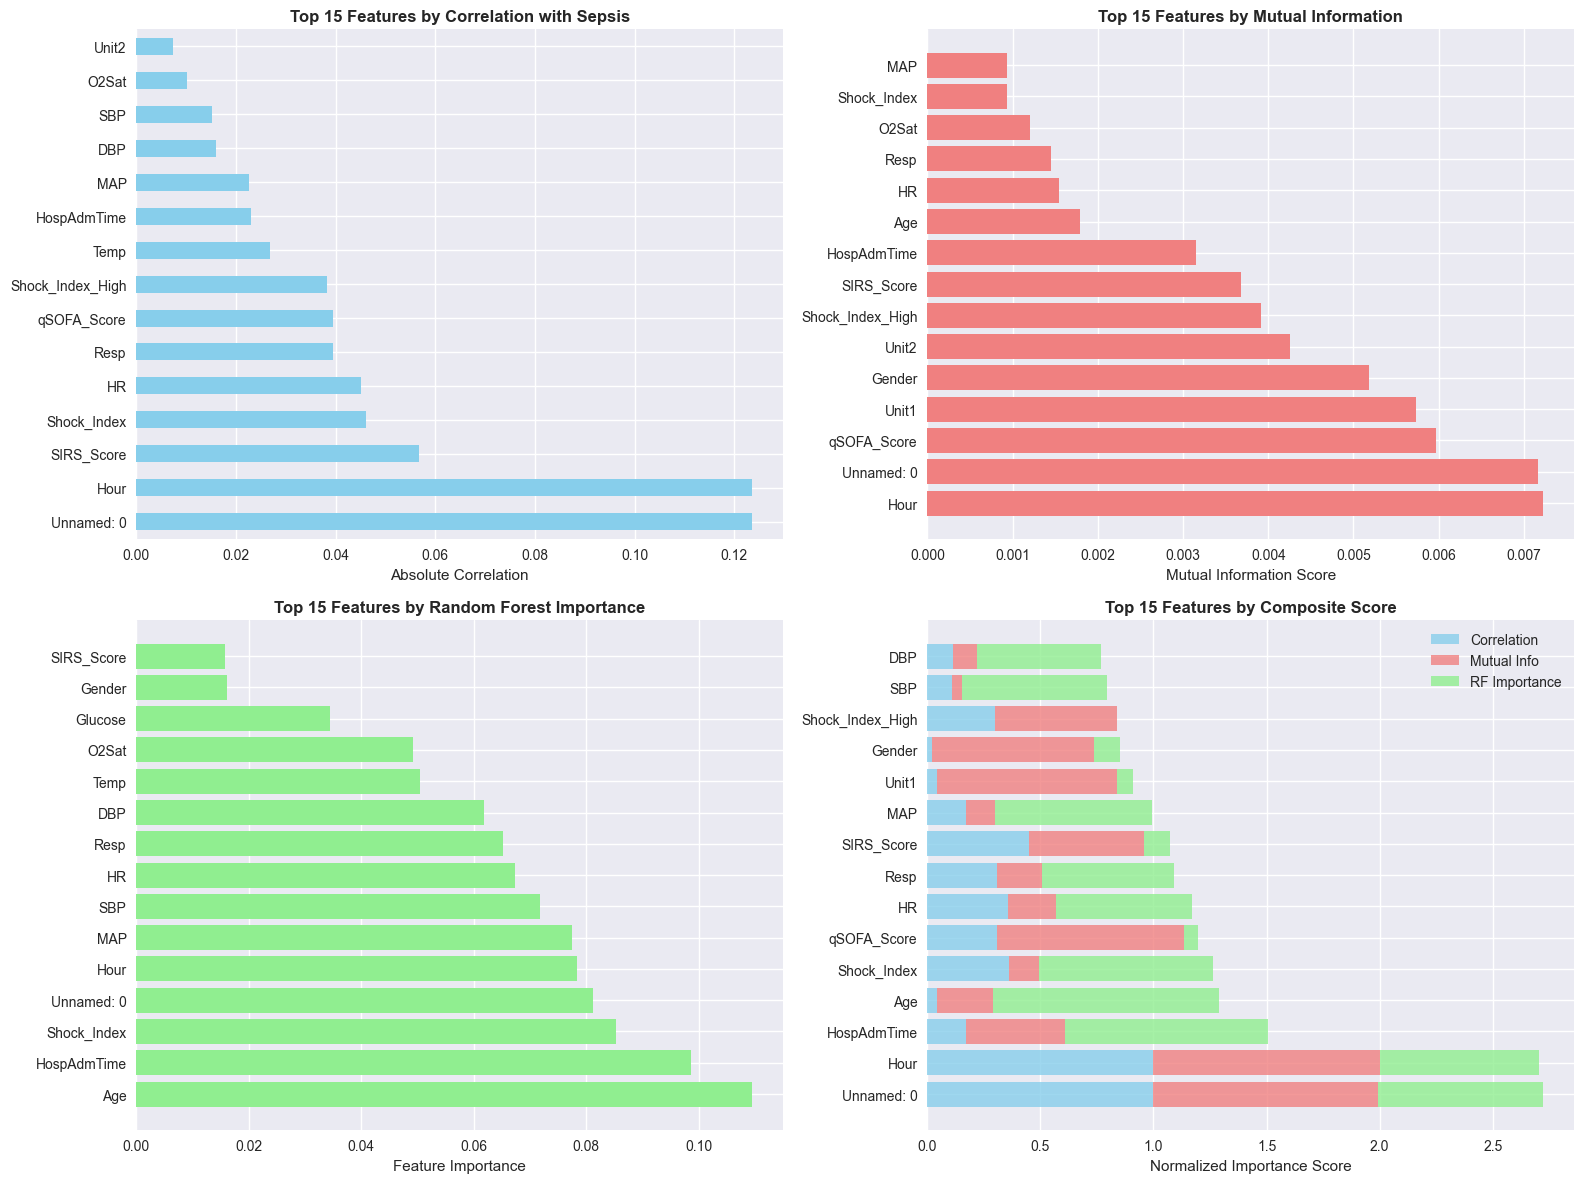


📊 Top 10 Features by Composite Importance Score:
 1. Unnamed: 0      (Score: 0.908)
 2. Hour            (Score: 0.902)
 3. HospAdmTime     (Score: 0.502)
 4. Age             (Score: 0.430)
 5. Shock_Index     (Score: 0.421)
 6. qSOFA_Score     (Score: 0.399)
 7. HR              (Score: 0.390)
 8. Resp            (Score: 0.363)
 9. SIRS_Score      (Score: 0.357)
10. MAP             (Score: 0.332)

🔍 Feature importance analysis complete


In [15]:
if len(feature_cols) > 0:
    # Prepare clean dataset for analysis
    X = df_sample[feature_cols].fillna(df_sample[feature_cols].median())
    y = df_sample['SepsisLabel']
    
    # Remove any remaining infinite values
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Correlation with target
    correlations = X.corrwith(y).abs().sort_values(ascending=False)
    top_corr_features = correlations.head(15)
    
    top_corr_features.plot(kind='barh', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Top 15 Features by Correlation with Sepsis', fontweight='bold')
    axes[0,0].set_xlabel('Absolute Correlation')
    
    # 2. Mutual Information
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.preprocessing import StandardScaler
    
    # Scale features for mutual information
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
    mi_df = pd.DataFrame({'Feature': feature_cols, 'MI_Score': mi_scores})
    mi_df = mi_df.sort_values('MI_Score', ascending=False).head(15)
    
    axes[0,1].barh(range(len(mi_df)), mi_df['MI_Score'], color='lightcoral')
    axes[0,1].set_yticks(range(len(mi_df)))
    axes[0,1].set_yticklabels(mi_df['Feature'])
    axes[0,1].set_title('Top 15 Features by Mutual Information', fontweight='bold')
    axes[0,1].set_xlabel('Mutual Information Score')
    
    # 3. Random Forest Feature Importance
    from sklearn.ensemble import RandomForestClassifier
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_scaled, y)
    
    rf_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False).head(15)
    
    axes[1,0].barh(range(len(rf_importance)), rf_importance['Importance'], color='lightgreen')
    axes[1,0].set_yticks(range(len(rf_importance)))
    axes[1,0].set_yticklabels(rf_importance['Feature'])
    axes[1,0].set_title('Top 15 Features by Random Forest Importance', fontweight='bold')
    axes[1,0].set_xlabel('Feature Importance')
    
    # 4. Feature Selection Comparison
    # Combine all importance scores
    importance_comparison = pd.DataFrame({
        'Feature': feature_cols,
        'Correlation': [correlations.get(f, 0) for f in feature_cols],
        'Mutual_Info': mi_scores,
        'RF_Importance': rf.feature_importances_
    })
    
    # Normalize scores to 0-1 range for comparison
    for col in ['Correlation', 'Mutual_Info', 'RF_Importance']:
        importance_comparison[col] = (importance_comparison[col] - importance_comparison[col].min()) / \
                                   (importance_comparison[col].max() - importance_comparison[col].min())
    
    # Calculate composite score
    importance_comparison['Composite_Score'] = (
        importance_comparison['Correlation'] + 
        importance_comparison['Mutual_Info'] + 
        importance_comparison['RF_Importance']
    ) / 3
    
    top_composite = importance_comparison.nlargest(15, 'Composite_Score')
    
    # Create stacked bar chart
    bottom1 = top_composite['Correlation']
    bottom2 = bottom1 + top_composite['Mutual_Info']
    
    axes[1,1].barh(range(len(top_composite)), top_composite['Correlation'], 
                   color='skyblue', label='Correlation', alpha=0.8)
    axes[1,1].barh(range(len(top_composite)), top_composite['Mutual_Info'], 
                   left=bottom1, color='lightcoral', label='Mutual Info', alpha=0.8)
    axes[1,1].barh(range(len(top_composite)), top_composite['RF_Importance'], 
                   left=bottom2, color='lightgreen', label='RF Importance', alpha=0.8)
    
    axes[1,1].set_yticks(range(len(top_composite)))
    axes[1,1].set_yticklabels(top_composite['Feature'])
    axes[1,1].set_title('Top 15 Features by Composite Score', fontweight='bold')
    axes[1,1].set_xlabel('Normalized Importance Score')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print top features summary
    print("\n📊 Top 10 Features by Composite Importance Score:")
    for i, (_, row) in enumerate(top_composite.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<15} (Score: {row['Composite_Score']:.3f})")
    
else:
    print("⚠️ Insufficient numeric features for importance analysis")

print("\n🔍 Feature importance analysis complete")

## 🧹 Step 8: Data Quality Assessment

In [16]:
# Data Quality and Preprocessing Recommendations
print("🧹 Generating data quality assessment and preprocessing recommendations...")

# Create comprehensive data quality report
quality_report = []

for col in df_sample.columns:
    if col in ['Patient_ID']:
        continue
        
    col_info = {
        'Feature': col,
        'Data_Type': str(df_sample[col].dtype),
        'Missing_Count': df_sample[col].isnull().sum(),
        'Missing_Percent': (df_sample[col].isnull().sum() / len(df_sample)) * 100,
        'Unique_Values': df_sample[col].nunique(),
        'Zero_Count': (df_sample[col] == 0).sum() if df_sample[col].dtype in ['int64', 'float64'] else 0,
        'Infinite_Count': np.isinf(df_sample[col]).sum() if df_sample[col].dtype in ['int64', 'float64'] else 0
    }
    
    if df_sample[col].dtype in ['int64', 'float64']:
        col_info.update({
            'Mean': df_sample[col].mean(),
            'Std': df_sample[col].std(),
            'Min': df_sample[col].min(),
            'Max': df_sample[col].max(),
            'Skewness': df_sample[col].skew(),
            'Kurtosis': df_sample[col].kurtosis()
        })
    
    quality_report.append(col_info)

quality_df = pd.DataFrame(quality_report)
print(f"📊 Quality assessment complete for {len(quality_df)} features")

🧹 Generating data quality assessment and preprocessing recommendations...
📊 Quality assessment complete for 48 features


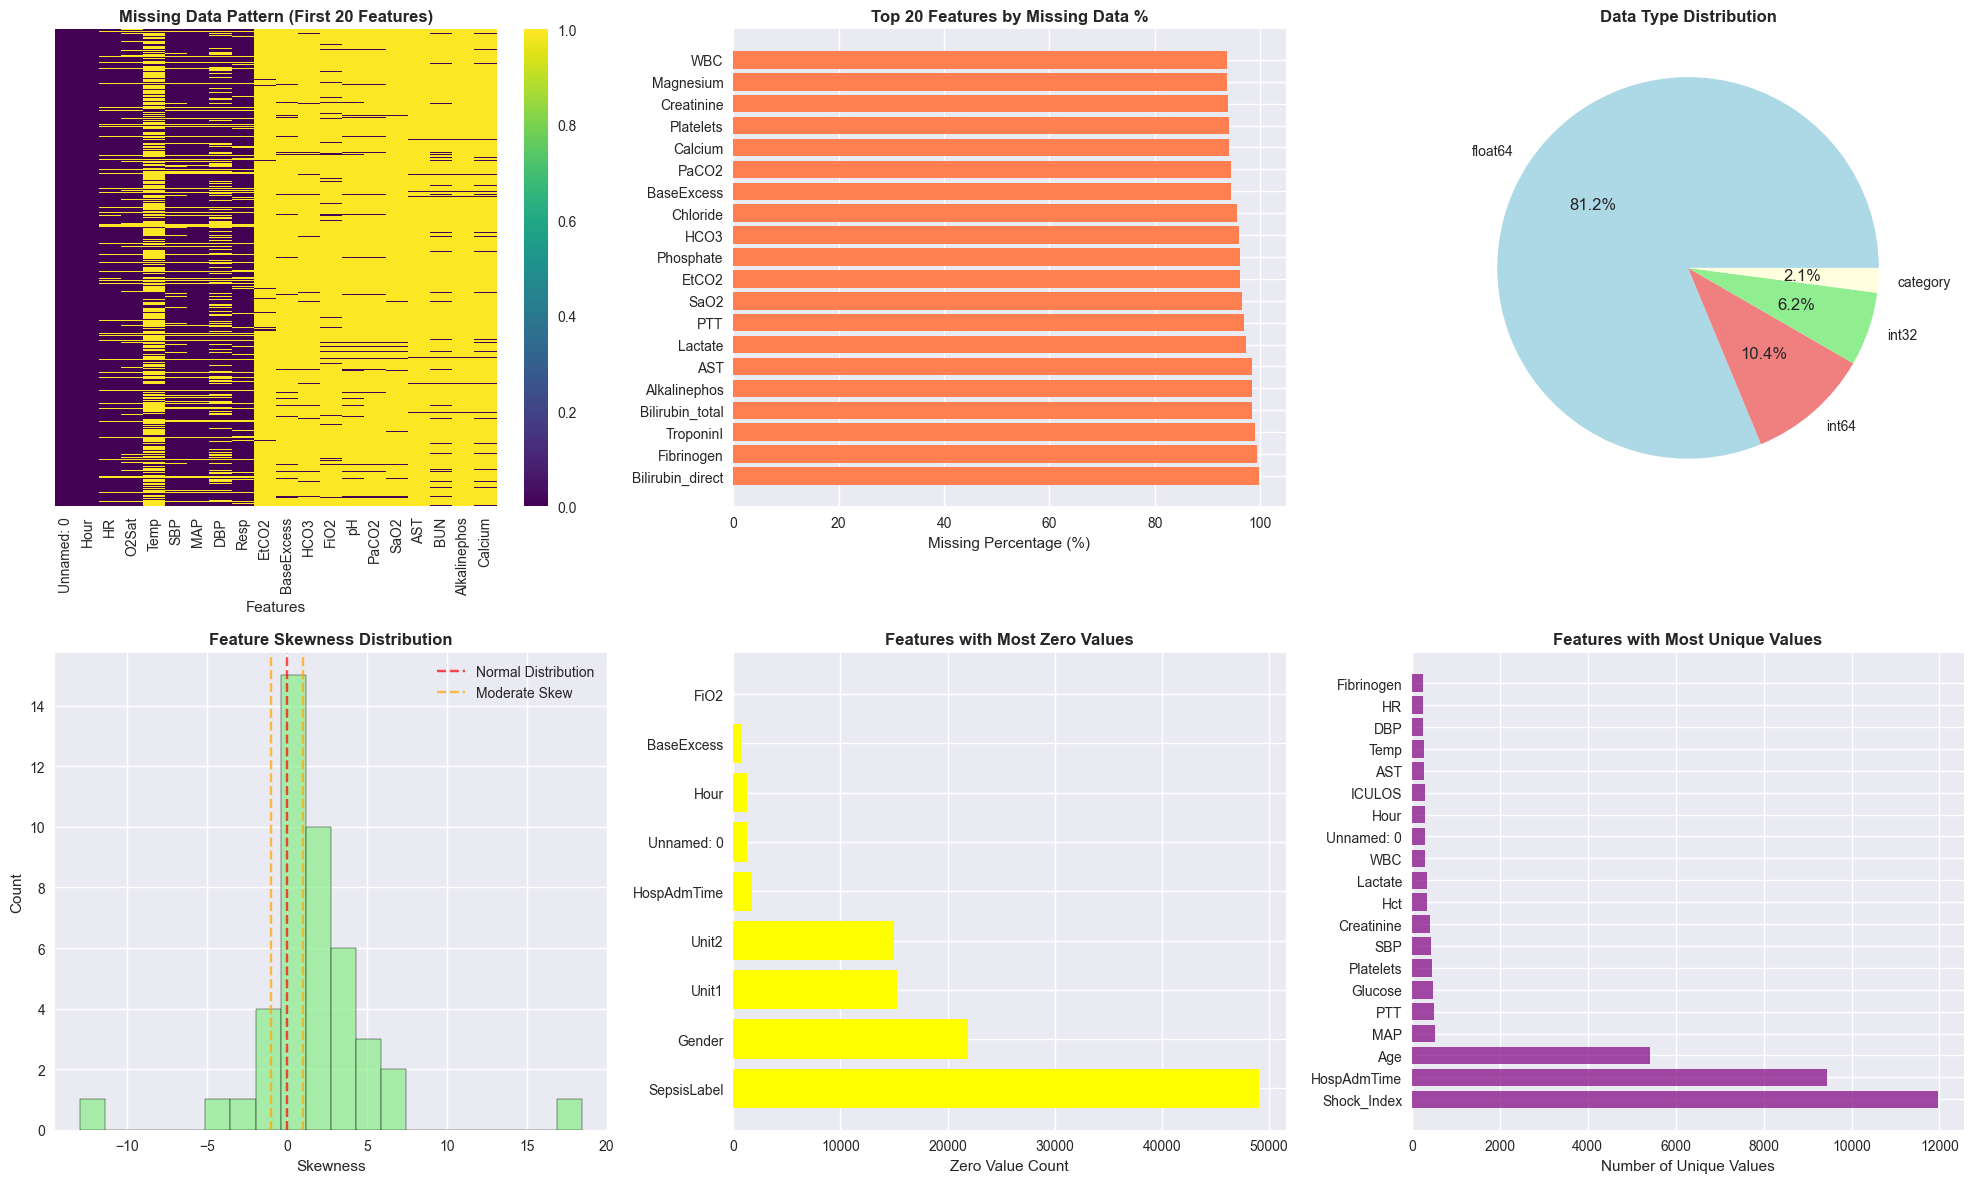

In [17]:
# Create visualizations for data quality
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Missing data heatmap
missing_matrix = df_sample.isnull()
sns.heatmap(missing_matrix.iloc[:, :20], cbar=True, ax=axes[0,0], 
            cmap='viridis', yticklabels=False)
axes[0,0].set_title('Missing Data Pattern (First 20 Features)', fontweight='bold')
axes[0,0].set_xlabel('Features')

# 2. Missing data percentage by feature
missing_pct = quality_df.sort_values('Missing_Percent', ascending=False).head(20)
axes[0,1].barh(range(len(missing_pct)), missing_pct['Missing_Percent'], color='coral')
axes[0,1].set_yticks(range(len(missing_pct)))
axes[0,1].set_yticklabels(missing_pct['Feature'])
axes[0,1].set_xlabel('Missing Percentage (%)')
axes[0,1].set_title('Top 20 Features by Missing Data %', fontweight='bold')

# 3. Data type distribution
dtype_counts = quality_df['Data_Type'].value_counts()
axes[0,2].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', 
              colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
axes[0,2].set_title('Data Type Distribution', fontweight='bold')

# 4. Skewness distribution for numeric features
numeric_quality = quality_df[quality_df['Data_Type'].isin(['int64', 'float64'])]
if not numeric_quality.empty and 'Skewness' in numeric_quality.columns:
    sns.histplot(numeric_quality['Skewness'].dropna(), bins=20, ax=axes[1,0], color='lightgreen')
    axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Normal Distribution')
    axes[1,0].axvline(x=1, color='orange', linestyle='--', alpha=0.7, label='Moderate Skew')
    axes[1,0].axvline(x=-1, color='orange', linestyle='--', alpha=0.7)
    axes[1,0].set_xlabel('Skewness')
    axes[1,0].set_title('Feature Skewness Distribution', fontweight='bold')
    axes[1,0].legend()

# 5. Zero values analysis
zero_analysis = numeric_quality[numeric_quality['Zero_Count'] > 0].nlargest(15, 'Zero_Count')
if not zero_analysis.empty:
    axes[1,1].barh(range(len(zero_analysis)), zero_analysis['Zero_Count'], color='yellow')
    axes[1,1].set_yticks(range(len(zero_analysis)))
    axes[1,1].set_yticklabels(zero_analysis['Feature'])
    axes[1,1].set_xlabel('Zero Value Count')
    axes[1,1].set_title('Features with Most Zero Values', fontweight='bold')

# 6. Unique values distribution
unique_analysis = quality_df.nlargest(20, 'Unique_Values')
axes[1,2].barh(range(len(unique_analysis)), unique_analysis['Unique_Values'], color='purple', alpha=0.7)
axes[1,2].set_yticks(range(len(unique_analysis)))
axes[1,2].set_yticklabels(unique_analysis['Feature'])
axes[1,2].set_xlabel('Number of Unique Values')
axes[1,2].set_title('Features with Most Unique Values', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
# Generate preprocessing recommendations
print("\n📋 DATA QUALITY SUMMARY & PREPROCESSING RECOMMENDATIONS:")
print("=" * 70)

# Missing data recommendations
high_missing = quality_df[quality_df['Missing_Percent'] > 50]
moderate_missing = quality_df[(quality_df['Missing_Percent'] > 10) & (quality_df['Missing_Percent'] <= 50)]
low_missing = quality_df[(quality_df['Missing_Percent'] > 0) & (quality_df['Missing_Percent'] <= 10)]

print(f"\n🔴 HIGH MISSING DATA (>50%): {len(high_missing)} features")
if not high_missing.empty:
    print("   Recommendation: Consider dropping these features or using advanced imputation")
    for _, row in high_missing.head(5).iterrows():
        print(f"   • {row['Feature']}: {row['Missing_Percent']:.1f}% missing")

print(f"\n🟡 MODERATE MISSING DATA (10-50%): {len(moderate_missing)} features")
if not moderate_missing.empty:
    print("   Recommendation: Use median/mode imputation or forward-fill for time series")
    for _, row in moderate_missing.head(3).iterrows():
        print(f"   • {row['Feature']}: {row['Missing_Percent']:.1f}% missing")

print(f"\n🟢 LOW MISSING DATA (<10%): {len(low_missing)} features")
if not low_missing.empty:
    print("   Recommendation: Simple imputation strategies work well")

# Skewness recommendations
numeric_quality = quality_df[quality_df['Data_Type'].isin(['int64', 'float64'])]
if not numeric_quality.empty and 'Skewness' in numeric_quality.columns:
    highly_skewed = numeric_quality[abs(numeric_quality['Skewness']) > 2]
    print(f"\n📊 HIGHLY SKEWED FEATURES (|skew| > 2): {len(highly_skewed)} features")
    if not highly_skewed.empty:
        print("   Recommendation: Apply log transformation or Box-Cox transformation")
        for _, row in highly_skewed.head(3).iterrows():
            print(f"   • {row['Feature']}: skewness = {row['Skewness']:.2f}")

# Zero values recommendations
high_zeros = numeric_quality[numeric_quality['Zero_Count'] > len(df_sample) * 0.3]
print(f"\n🔢 HIGH ZERO VALUES (>30%): {len(high_zeros)} features")
if not high_zeros.empty:
    print("   Recommendation: Consider zero-inflation handling or feature engineering")
    for _, row in high_zeros.head(3).iterrows():
        zero_pct = (row['Zero_Count'] / len(df_sample)) * 100
        print(f"   • {row['Feature']}: {zero_pct:.1f}% zeros")

print("\n🧹 Data quality assessment complete!")


📋 DATA QUALITY SUMMARY & PREPROCESSING RECOMMENDATIONS:

🔴 HIGH MISSING DATA (>50%): 28 features
   Recommendation: Consider dropping these features or using advanced imputation
   • Temp: 66.3% missing
   • EtCO2: 96.1% missing
   • BaseExcess: 94.5% missing
   • HCO3: 95.9% missing
   • FiO2: 91.6% missing

🟡 MODERATE MISSING DATA (10-50%): 8 features
   Recommendation: Use median/mode imputation or forward-fill for time series
   • O2Sat: 13.1% missing
   • SBP: 14.4% missing
   • MAP: 12.5% missing

🟢 LOW MISSING DATA (<10%): 1 features
   Recommendation: Simple imputation strategies work well

📊 HIGHLY SKEWED FEATURES (|skew| > 2): 18 features
   Recommendation: Apply log transformation or Box-Cox transformation
   • Unnamed: 0: skewness = 4.08
   • Hour: skewness = 4.08
   • O2Sat: skewness = -4.81

🔢 HIGH ZERO VALUES (>30%): 3 features
   Recommendation: Consider zero-inflation handling or feature engineering
   • Gender: 43.8% zeros
   • Unit1: 30.5% zeros
   • SepsisLabel: 98

## 📊 Step 9: Final Summary and Recommendations

In [19]:
# Final Summary and Next Steps
print("📊 PREPROCESSING ANALYSIS COMPLETE - SUMMARY REPORT")
print("=" * 60)

# Dataset overview
total_patients = df_sample['Patient_ID'].nunique()
total_records = len(df_sample)
sepsis_patients = df_sample[df_sample['SepsisLabel'] == 1]['Patient_ID'].nunique()
sepsis_rate = (sepsis_patients / total_patients) * 100

print(f"\n📈 DATASET OVERVIEW:")
print(f"   • Total Patients: {total_patients:,}")
print(f"   • Total Records: {total_records:,}")
print(f"   • Sepsis Patients: {sepsis_patients:,} ({sepsis_rate:.1f}%)")
print(f"   • Average Records per Patient: {total_records/total_patients:.1f}")

# Feature summary
total_features = len(df_sample.columns) - 2  # Exclude Patient_ID and SepsisLabel
numeric_features = len(df_sample.select_dtypes(include=[np.number]).columns) - 2
categorical_features = total_features - numeric_features

print(f"\n🔢 FEATURE SUMMARY:")
print(f"   • Total Features: {total_features}")
print(f"   • Numeric Features: {numeric_features}")
print(f"   • Categorical Features: {categorical_features}")

# Data quality summary
high_quality_features = len(quality_df[quality_df['Missing_Percent'] < 10])
medium_quality_features = len(quality_df[(quality_df['Missing_Percent'] >= 10) & (quality_df['Missing_Percent'] < 50)])
low_quality_features = len(quality_df[quality_df['Missing_Percent'] >= 50])

print(f"\n🎯 DATA QUALITY SUMMARY:")
print(f"   • High Quality (<10% missing): {high_quality_features} features")
print(f"   • Medium Quality (10-50% missing): {medium_quality_features} features")
print(f"   • Low Quality (>50% missing): {low_quality_features} features")

📊 PREPROCESSING ANALYSIS COMPLETE - SUMMARY REPORT

📈 DATASET OVERVIEW:
   • Total Patients: 26,996
   • Total Records: 50,000
   • Sepsis Patients: 791 (2.9%)
   • Average Records per Patient: 1.9

🔢 FEATURE SUMMARY:
   • Total Features: 47
   • Numeric Features: 46
   • Categorical Features: 1

🎯 DATA QUALITY SUMMARY:
   • High Quality (<10% missing): 12 features
   • Medium Quality (10-50% missing): 8 features
   • Low Quality (>50% missing): 28 features


In [20]:
# Recommended next steps
print(f"\n🚀 RECOMMENDED NEXT STEPS:")
print(f"   1. 🧹 Data Cleaning:")
print(f"      • Handle missing values using appropriate imputation strategies")
print(f"      • Remove or transform highly skewed features")
print(f"      • Address outliers in vital signs and lab values")
print(f"   ")
print(f"   2. 🔧 Feature Engineering:")
print(f"      • Create clinical composite scores (SIRS, qSOFA)")
print(f"      • Generate temporal features (rolling statistics, trends)")
print(f"      • Build interaction features between related variables")
print(f"   ")
print(f"   3. ⚖️ Data Preprocessing:")
print(f"      • Apply appropriate scaling techniques")
print(f"      • Handle class imbalance (SMOTE, class weights)")
print(f"      • Create train/validation/test splits with temporal considerations")
print(f"   ")
print(f"   4. 🤖 Model Development:")
print(f"      • Start with baseline models (Logistic Regression, Random Forest)")
print(f"      • Experiment with advanced models (XGBoost, Neural Networks)")
print(f"      • Consider time-series specific models (LSTM, GRU)")
print(f"   ")
print(f"   5. 📊 Model Evaluation:")
print(f"      • Use appropriate metrics (AUROC, AUPRC, Early Warning Score)")
print(f"      • Implement cross-validation with temporal splits")
print(f"      • Analyze feature importance and model interpretability")

# Create a simple preprocessing pipeline recommendation
print(f"\n🔄 SUGGESTED PREPROCESSING PIPELINE:")
pipeline_steps = [
    "1. Load and merge patient data files",
    "2. Handle missing values (forward-fill for time series, median for others)",
    "3. Remove outliers (IQR method or clinical thresholds)",
    "4. Create clinical composite features",
    "5. Generate temporal rolling features (6h, 12h, 24h windows)",
    "6. Apply feature scaling (StandardScaler or RobustScaler)",
    "7. Handle class imbalance",
    "8. Create temporal train/test splits",
    "9. Feature selection based on importance analysis",
    "10. Final dataset preparation for modeling"
]

for step in pipeline_steps:
    print(f"   {step}")

print(f"\n✅ Preprocessing analysis complete! Ready for model development.")
print(f"\n💡 Tip: Save this analysis and refer back to it during model development.")
print(f"    The insights from this EDA will guide your preprocessing decisions.")


🚀 RECOMMENDED NEXT STEPS:
   1. 🧹 Data Cleaning:
      • Handle missing values using appropriate imputation strategies
      • Remove or transform highly skewed features
      • Address outliers in vital signs and lab values
   
   2. 🔧 Feature Engineering:
      • Create clinical composite scores (SIRS, qSOFA)
      • Generate temporal features (rolling statistics, trends)
      • Build interaction features between related variables
   
   3. ⚖️ Data Preprocessing:
      • Apply appropriate scaling techniques
      • Handle class imbalance (SMOTE, class weights)
      • Create train/validation/test splits with temporal considerations
   
   4. 🤖 Model Development:
      • Start with baseline models (Logistic Regression, Random Forest)
      • Experiment with advanced models (XGBoost, Neural Networks)
      • Consider time-series specific models (LSTM, GRU)
   
   5. 📊 Model Evaluation:
      • Use appropriate metrics (AUROC, AUPRC, Early Warning Score)
      • Implement cross-validat